In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import math
import random
from sklearn import preprocessing

# SET VALUES
N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6
np.random.seed(100)

### QUESTION 1

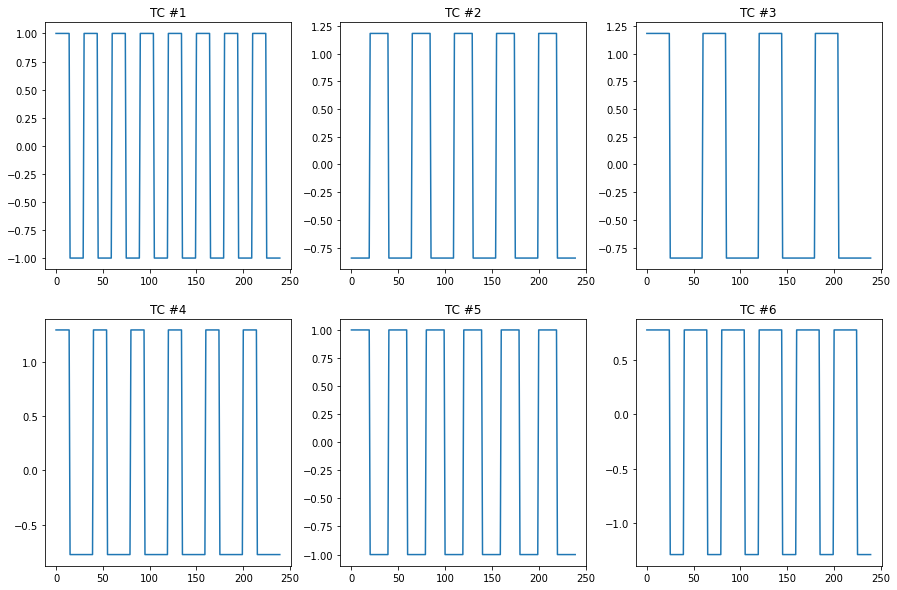

In [2]:
# q1.1
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration_of_ones = [15,20,25,15,20,25]
tc_matrix = np.zeros(shape=(240,6))

# Adding 1s and 0s into the TC matrix
for column in range(0,6):
    for row in range(AV[column],220,IV[column]):
        for ones in range(0, duration_of_ones[column]):
            tc_matrix[row+ones][column] = 1
    
# Mean center and standardize each TC
for column in range(0,6):
    column_mean = np.mean(tc_matrix[:,column], axis = 0)
    column_std = np.std(tc_matrix[:,column], axis = 0)
    for row in range(0,240):
        tc_matrix[row][column] = (tc_matrix[row][column] - column_mean)/column_std

# Plot each TCs
fig, axs = plt.subplots(2, 3, figsize = (15,10))
for col in range(0,6):
    axs[col//3][col%3].plot(range(0,240),tc_matrix[:,col])
    axs[col//3][col%3].set(title="TC #"+str(col+1))

plt.savefig("q1.1 - 6 TCs.png")

If l2-norm normalization is used, the mean will not be centered around 0 and the solution will not be sparse. Thus, the resulting graph for the TCs will be the same.

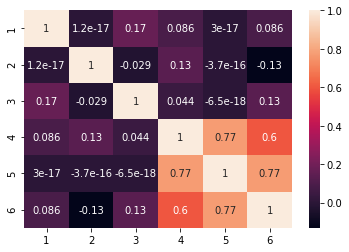

In [3]:
# q1.2
cm_data = {1: tc_matrix[:,0],
        2: tc_matrix[:,1],
        3: tc_matrix[:,2],
        4: tc_matrix[:,3],
        5: tc_matrix[:,4],
        6: tc_matrix[:,5]}

# store the data into a dataframe and then make a correlation matrix
tc_df = pd.DataFrame(cm_data,columns=[1,2,3,4,5,6])
correlation_matrix = tc_df.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.savefig("q1.2 - CM.png")

It is hard to tell which TCs are highly correlated from the plot in 1.1. However, using the correlation matrix, we are able to see that TC 4 is correlated with TC 5 and 6. TC 5 is also correlated with TC 6.

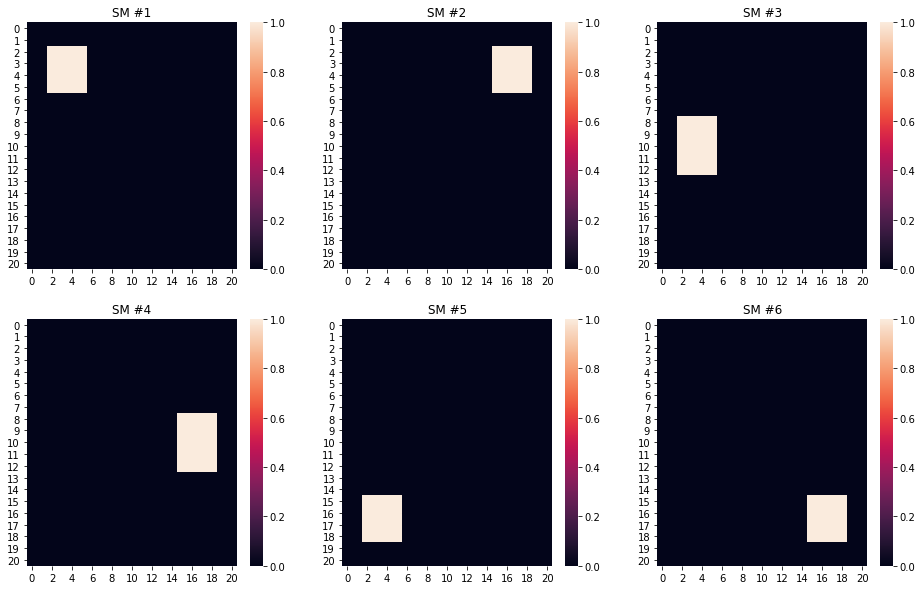

In [4]:
# q1.3
tmpSM_matrix = np.zeros(shape=(6,21,21))
vertical = [(2,6),(2,6),(8,13),(8,13),(15,19),(15,19)]
horizontal = [(2,6),(15,19),(2,6),(15,19),(2,6),(15,19)]

# fill in the matrix with 1s
for z in range(0,6):
    for row in range(vertical[z][0],vertical[z][1]):
        for column in range(horizontal[z][0],horizontal[z][1]):
            tmpSM_matrix[z][row][column] = 1
            
# plot the SMs
tmpSM_df = pd.DataFrame(cm_data,columns=[1,2,3,4,5,6])
fig, axs = plt.subplots(2, 3, figsize = (16,10))
for i in range(0,6):
    sn.heatmap(tmpSM_matrix[i,:,:], ax = axs[i // 3][i % 3])
    axs[i//3][i%3].set(title="SM #"+str(i+1))
    
plt.savefig("q1.3 - SMs.png")

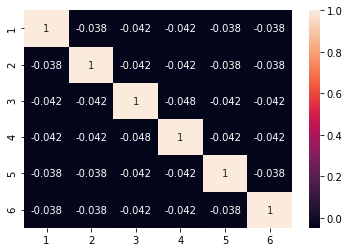

In [5]:
# 1.3 continued

# reshape into tmpSM
sm_matrix = tmpSM_matrix.reshape(6,441)
sm_data = {1: sm_matrix[0,:],
        2: sm_matrix[1,:],
        3: sm_matrix[2,:],
        4: sm_matrix[3,:],
        5: sm_matrix[4,:],
        6: sm_matrix[5,:]}

# store the data into a dataframe and then make a correlation matrix
sm_df = pd.DataFrame(sm_data,columns=[1,2,3,4,5,6])
correlation_matrix = sm_df.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.savefig("q1.3 - CM.png")

The 6 vectors are not correlated, but we cannot fully say that they are independent as no correlation does not imply independence. Standardization is not needed as each vector has similar mean and standard deviation, rendering standardization useless.

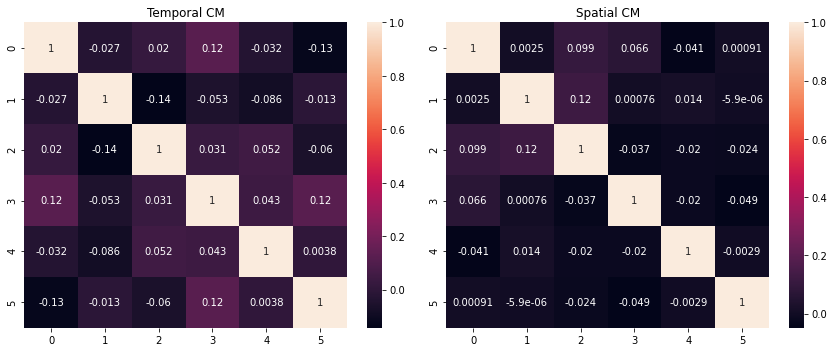

In [6]:
# q1.4

samples_t = np.random.normal(scale = np.sqrt(0.25), size = (240,6))
samples_s = np.random.normal(scale = np.sqrt(0.015), size = (6,441))

t_corr = np.corrcoef(samples_t.T)
s_corr = np.corrcoef(samples_s)

fig, axs = plt.subplots(1,2, figsize = (12,5))
sn.heatmap(t_corr, ax=axs[0], annot=True)
axs[0].set_title("Temporal CM")

sn.heatmap(s_corr, ax = axs[1], annot=True)
axs[1].set_title("Spatial CM")

fig.tight_layout()
plt.savefig("q1.4 - CM for each noise.png")

The sources within the noise are either not correlated or weakly correlated. However, we can't know if the 2 noises, temporal and spatial, are correlated by looking at them separately.

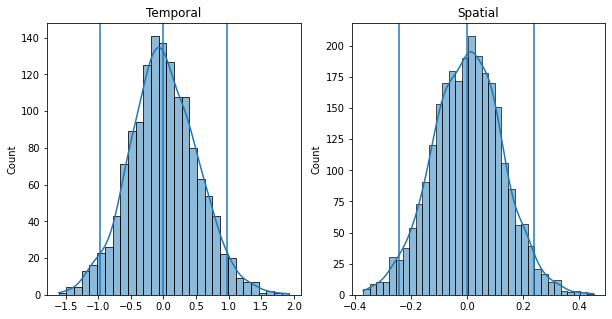

In [7]:
# 1.4 continued

# plotting the histogram

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (10,5))
# temporal
t_array = samples_t.reshape(240*6)
# ax1.hist(t_array, edgecolor='black', linewidth=1)
sn.histplot(t_array, kde = True, ax=ax1)
ax1.axvline(-1.96*np.sqrt(0.25), 0 , len(t_array))
ax1.axvline(1.96*np.sqrt(0.25), 0 , len(t_array))
ax1.axvline(0, 0 , len(t_array))
ax1.set(title='Temporal')

# spatial
s_array = samples_s.reshape(6*441)
sn.histplot(s_array, kde = True, ax=ax2)
ax2.axvline(-1.96*np.sqrt(0.015), 0 , len(s_array))
ax2.axvline(1.96*np.sqrt(0.015), 0 , len(s_array))
ax2.axvline(0, 0 , len(t_array))
ax2.set(title='Spatial')

plt.savefig("q1.4 - Histogram for each noise.png")

Yes, as the histograms are in a bell shaped curve, we can assume that both noise sources have a normal distribution. The normal distribution fulfills the mean and variance = 1.96σ criteria relating to 0.25, 0.015, and zero mean with greater density in the middle.

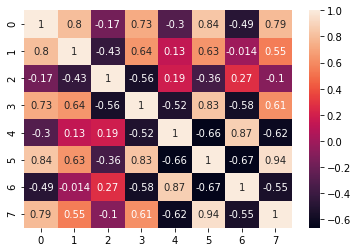

In [8]:
# 1.4 continued

# plotting heatmap for product
combined_samples = np.matmul(samples_t[0:8,0:8], samples_s[0:8,0:8])
combined_df = pd.DataFrame(combined_samples)
correlation_matrix = combined_df.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.savefig("q1.4 - CM across V variables.png")

From the small sample, we can see that some variables from the product ΓtΓs are correlated across V number of variables. 

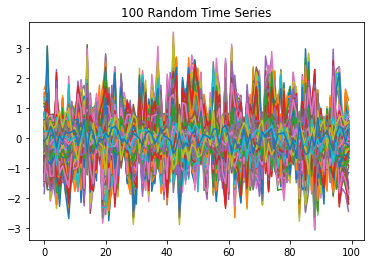

In [9]:
# q1.5
X = np.matmul((tc_matrix + samples_t),(sm_matrix + samples_s))

# plot 100 random time series from X
rng = np.random.default_rng()
X_sample = rng.choice(X, 100)
plt.plot(X_sample)
plt.title('100 Random Time Series')
plt.savefig("q1.5 - 100 random time series.png")

Yes the products of TC × Γs and Γt × SM exist as the shapes of the matrix match. They produce noise or straight zeros. As such, we can include them in the error term E.

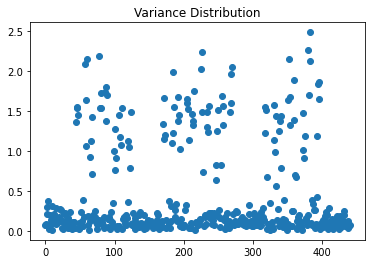

In [45]:
# 1.5 continued

# plot all 441 variable's variance
X_var = np.var(X, axis = 0)
var_df = pd.DataFrame()
var_df['var'] = X_var
plt.scatter(var_df.index, var_df['var'])
# plt.plot(X_var)
plt.title('Variance Distribution')
plt.savefig("q1.5 - Variance distribution.png")

The plot shows the variance distribution throughout the variables. There are multiple peaks, this denotes that there are multiple distributions used to generate X. We can also see that variance in X is inconsistent.

In [11]:
# 1.5 continued
X_mean = np.mean(X, axis = 0)
X_new = (X-X_mean)/np.sqrt(X_var)
print(X_new)

[[ 0.89124279  1.44547164 -0.93742545 ... -1.43111758  0.36181522
   0.20986234]
 [ 0.70732924  1.48901229 -1.4774798  ... -0.43882787 -0.25599613
   0.46548007]
 [ 0.59802244  0.86232631 -1.02134932 ... -1.003114   -0.51304277
  -0.25458118]
 ...
 [ 0.90855578  0.64083805  0.01871701 ...  1.4069375   0.27456422
   0.54349365]
 [ 0.35997519  0.32028821 -0.38747727 ...  0.95850484  0.22376825
   1.17859219]
 [ 1.26034437  1.23638376  0.01896639 ...  1.65926972  1.19812214
   1.02186399]]


### QUESTION 2

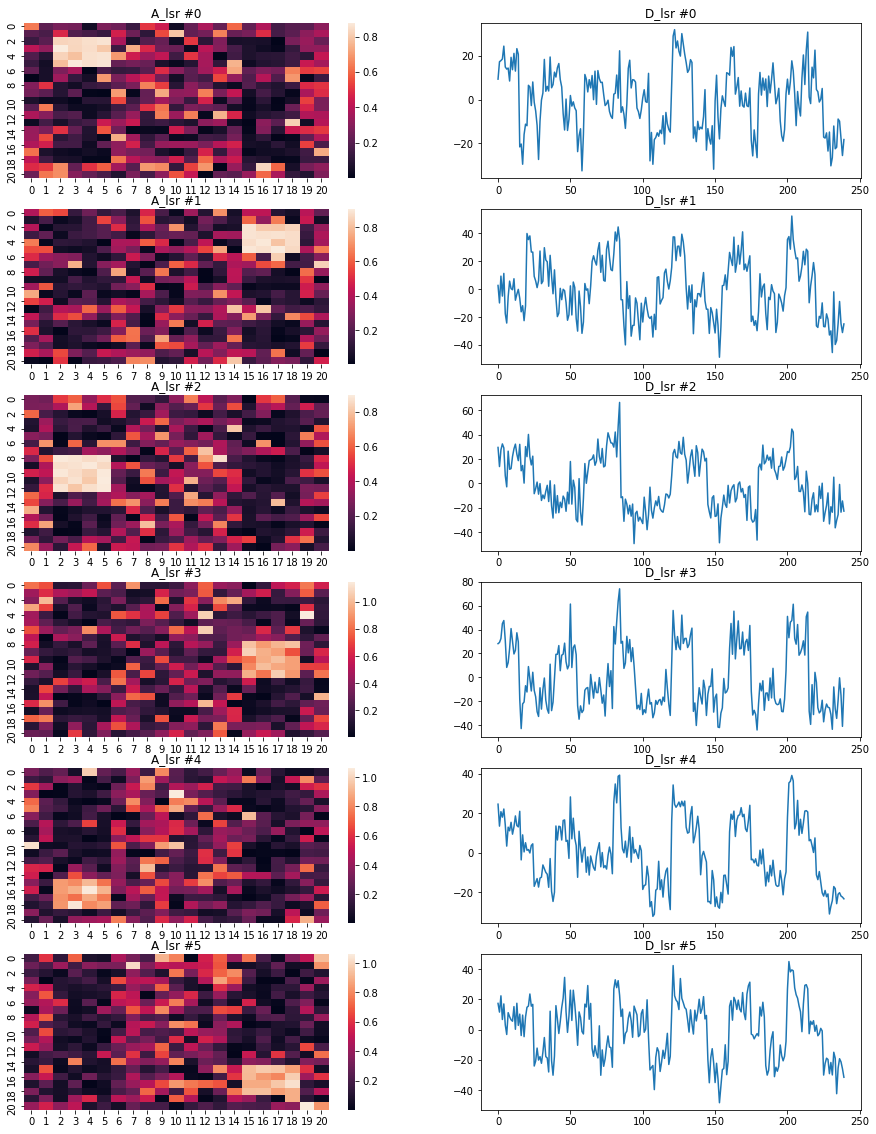

In [12]:
# q2.1

# setting up the required matrix
tc_matrix_t = tc_matrix.transpose()
DtD = np.matmul(tc_matrix_t, tc_matrix)
DtX = np.matmul(tc_matrix_t, X_new)
DtD_inv = np.linalg.inv(DtD)

# making A_lsr and its variation
A_lsr = abs(np.matmul(DtD_inv, DtX))
A_lsr_t = A_lsr.transpose()
A_lsr_reshaped = A_lsr.reshape(6,21,21)

# making D_lsr
D_lsr = np.matmul(X_new, A_lsr_t)

# plotting the sources side by side
fig, axs = plt.subplots(6, 2, figsize = (15,20))

# plot the sources side by side
for row in range(0,6):
    sn.heatmap(A_lsr_reshaped[row,:,:], ax = axs[row][0])
    axs[row][0].set(title="A_lsr #"+str(row))
    axs[row][1].plot(D_lsr[:,row])
    axs[row][1].set(title="D_lsr #"+str(row))

plt.savefig("q2.1 - Six sources.png")

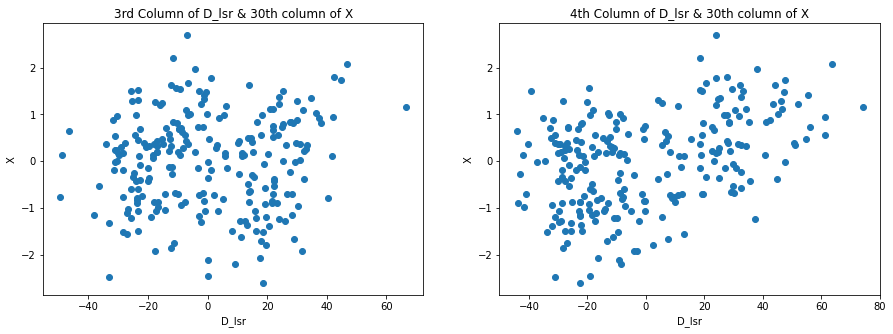

In [13]:
# 2.1 continued

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))
# scatter plot 1
ax1.scatter(D_lsr[:,2], X_new[:,29])
ax1.set(title = '3rd Column of D_lsr & 30th column of X', xlabel = 'D_lsr', ylabel = 'X')

# scatter plot 2
ax2.scatter(D_lsr[:,3], X_new[:,29])
ax2.set(title = '4th Column of D_lsr & 30th column of X', xlabel = 'D_lsr', ylabel = 'X')

plt.savefig("q2.1 - Scatter plot 1.png")

The linear relationship is hard to see because python flatten function works differently than R. A better graph is shown below.

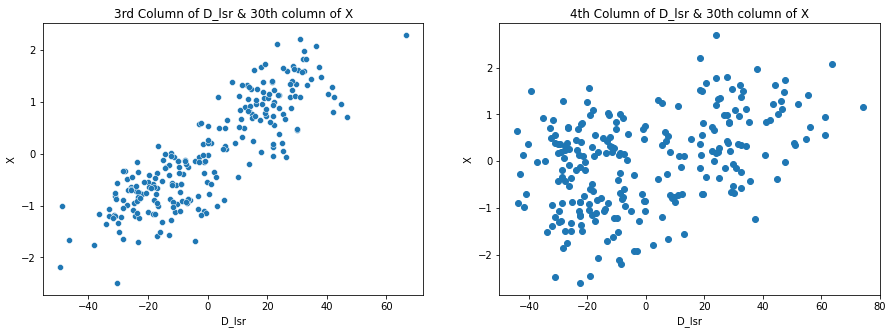

In [14]:
# 2.1 continued

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))
sn.scatterplot(x = D_lsr.transpose()[2], y = X_new.transpose()[9*21 + 2], ax=ax1)
ax1.set(title = '3rd Column of D_lsr & 30th column of X', xlabel = 'D_lsr', ylabel = 'X')

ax2.scatter(D_lsr[:,3], X_new[:,29])
ax2.set(title = '4th Column of D_lsr & 30th column of X', xlabel = 'D_lsr', ylabel = 'X')

plt.savefig("q2.1 - Scatter plot 2.png")

The 30th pixel position is filled by the 3rd SM. Thus, the third TC is the only time course that constructs 30th column of X. This 3rd TC is obtained from 3rd D_lsr. As such, there is no linear relationship from 4th column of D_lsr and the 30th pixel.

In [15]:
# q2.2

# setting up required matrix
lambda_i = 0.4 * 441 * np.identity(6)
DtD_lambda_inv = np.linalg.inv(DtD + lambda_i)

# creating A_rr
A_rr = abs(np.matmul(DtD_lambda_inv, DtX))
A_rr_t = A_rr.transpose()

# creating D_rr
D_rr = np.matmul(X_new, A_rr_t)

# creating c_tlsr
c_matrix = np.zeros(shape=(6,6))
for col1 in range(0,6):
    for col2 in range(0,6):
        tmp_c = np.corrcoef(tc_matrix[:,col1], D_lsr[:,col2])[0][1]
        c_matrix[col1][col2] = tmp_c
c_absolute = np.absolute(c_matrix)
c_tlsr = c_absolute.max(axis=0)

# creating c_trr
d_matrix = np.zeros(shape=(6,6))
for col1 in range(0,6):
    for col2 in range(0,6):
        tmp_d = np.corrcoef(tc_matrix[:,col1], D_rr[:,col2])[0][1]
        d_matrix[col1][col2] = tmp_d
d_absolute = np.absolute(d_matrix)
c_trr = d_absolute.max(axis=0)

print("c_tlsr:",sum(c_tlsr))
print("c_trr:",sum(c_trr))

c_tlsr: 4.8088494945339715
c_trr: 4.92980207735962


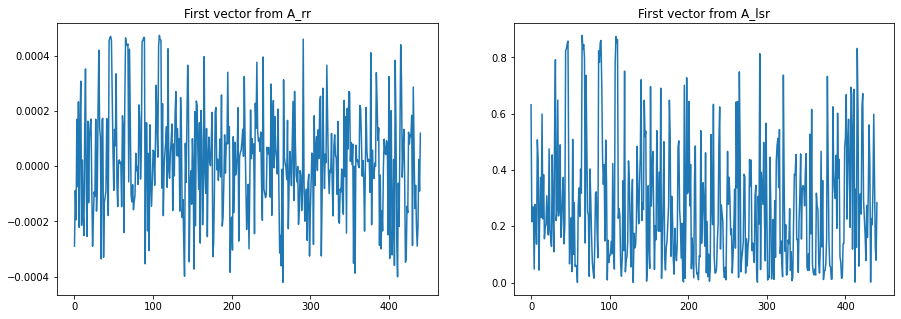

In [16]:
# 2.2 continued

# setting up required matrix
lambda_new = 1000 * V * np.identity(6)
DtD_lambda_inv_new = np.linalg.inv(DtD + lambda_new)

# creating new A_rr
A_rr_new = np.matmul(DtD_lambda_inv_new, DtX)

# plotting
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.plot(A_rr_new[0,:])
ax1.set(title = 'First vector from A_rr')
ax2.plot(A_lsr[0,:])
ax2.set(title = 'First vector from A_lsr')

plt.savefig("q2.2 - First vector comparison.png")

From the graph, we can see that the values in A_rr are indeed shrinking towards zero.

In [17]:
# q2.3
rho = np.arange(0.0,1.05,0.05)
tc_matrix_t = tc_matrix.transpose()

# getting A_lr using LR
step = 1 / np.linalg.norm(np.matmul(tc_matrix, tc_matrix_t) * 1.1)
MSE_avg = []
for z in rho:
    MSE_result = []
    for count in range(0,10):
        samples_t = np.random.normal(scale = np.sqrt(0.25), size = (240,6))
        samples_s = np.random.normal(scale = np.sqrt(0.015), size = (6,441))
        X = np.matmul((tc_matrix + samples_t),(sm_matrix + samples_s))
        X_new = preprocessing.scale(X)
        thr = z * N * step
        Ao = np.zeros(shape=(nsrcs, 1))
        A = np.zeros(shape=(nsrcs, 1))
        A_lr = np.zeros(shape=(nsrcs, x1*x2))
        for k in range(0,x1*x2):
            val1 = (X_new[:,k].reshape(X_new.shape[0],) - np.matmul(tc_matrix, Ao).reshape(X_new.shape[0],))
            A = Ao.reshape(Ao.shape[0],) + step*(np.matmul(tc_matrix_t, val1)).reshape(Ao.shape[0])
            A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr)
            for i in range(0,10):
                Ao = A
                A = Ao + step*(np.matmul(tc_matrix_t, X_new[:,k] - np.matmul(tc_matrix, Ao)))
                A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr))
            A_lr[:,k] = A
        D_lr = np.matmul(X_new, A_lr.transpose())
        MSE = sum(sum((X_new - np.matmul(D_lr, A_lr))**2)) / (N*V)
        MSE_result.append(MSE)
    MSE_avg.append(sum(MSE_result) / len(MSE_result))

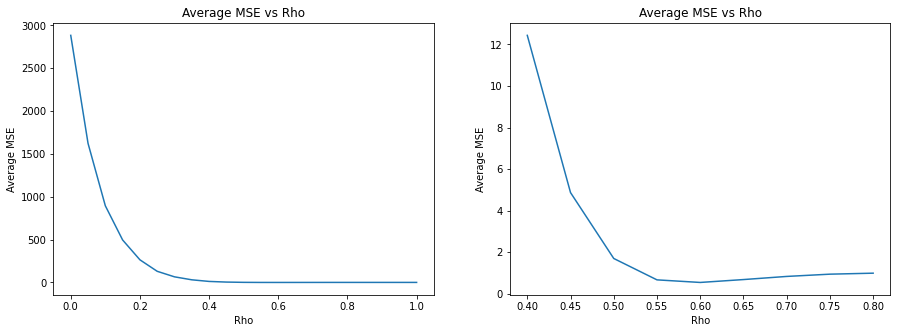

In [18]:
# 2.3 continued

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))
# plotting mse vs rho
ax1.plot(rho, MSE_avg)
ax1.set(title = 'Average MSE vs Rho', xlabel = 'Rho', ylabel = 'Average MSE')

# zooming in
ax2.plot(rho[8:17], MSE_avg[8:17])
ax2.set(title = 'Average MSE vs Rho', xlabel = 'Rho', ylabel = 'Average MSE')

plt.savefig("q2.3 - Average MSE.png")

The minimum MSE is found when rho = 0.6. It is okay to select this value as we are aiming for the smallest MSE to yield the optimal result. MSE started to increase again when rho is greater than 0.6

In [19]:
# q2.4i

# estimate LR params with rho = 0.6
samples_t = np.random.normal(scale = np.sqrt(0.25), size = (240,6))
samples_s = np.random.normal(scale = np.sqrt(0.015), size = (6,441))
X = np.matmul((tc_matrix + samples_t),(sm_matrix + samples_s))
X_new = preprocessing.scale(X)
thr = 0.6 * N * step
Ao = np.zeros(shape=(nsrcs, 1))
A = np.zeros(shape=(nsrcs, 1))
A_lr = np.zeros(shape=(nsrcs, x1*x2))
for k in range(0,x1*x2):
    val1 = (X_new[:,k].reshape(X_new.shape[0],) - np.matmul(tc_matrix, Ao).reshape(X_new.shape[0],))
    A = Ao.reshape(Ao.shape[0],) + step*(np.matmul(tc_matrix_t, val1)).reshape(Ao.shape[0])
    A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr)
    for i in range(0,10):
        Ao = A
        A = Ao + step*(np.matmul(tc_matrix_t, X_new[:,k] - np.matmul(tc_matrix, Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr))
    A_lr[:,k] = A
A_lr_abs = abs(A_lr)
D_lr = np.matmul(X_new, A_lr.transpose())

In [20]:
# 2.4i continued

# creating c_trr
matrix1 = np.zeros(shape=(6,6))
for col1 in range(0,6):
    for col2 in range(0,6):
        tmp_d = np.corrcoef(tc_matrix[:,col1], D_rr[:,col2])[0][1]
        matrix1[col1][col2] = tmp_d
d_absolute = np.absolute(matrix1)
c_trr = d_absolute.max(axis=0)

# creating c_srr
matrix2 = np.zeros(shape=(6,6))
for col1 in range(0,6):
    for col2 in range(0,6):
        tmp_d = np.corrcoef(sm_matrix[col1,:], A_rr[col2,:])[0][1]
        matrix2[col1][col2] = tmp_d
d_absolute = np.absolute(matrix2)
c_srr = d_absolute.max(axis=0)

# creating c_tlr
matrix3 = np.zeros(shape=(6,6))
for col1 in range(0,6):
    for col2 in range(0,6):
        tmp_d = np.corrcoef(tc_matrix[:,col1], D_lr[:,col2])[0][1]
        matrix3[col1][col2] = tmp_d
d_absolute = np.absolute(matrix3)
c_tlr = d_absolute.max(axis=0)

# creating c_slr
matrix4 = np.zeros(shape=(6,6))
for col1 in range(0,6):
    for col2 in range(0,6):
        tmp_d = np.corrcoef(sm_matrix[col1,:], A_lr_abs[col2,:])[0][1]
        matrix4[col1][col2] = tmp_d
d_absolute = np.absolute(matrix4)
c_slr = d_absolute.max(axis=0)

print("c_tlr:",sum(c_tlr))
print("c_trr:",sum(c_trr))
print("c_slr:",sum(c_slr))
print("c_srr:",sum(c_srr))

c_tlr: 5.411670427263415
c_trr: 4.92980207735962
c_slr: 4.603905575776614
c_srr: 2.897384454614079


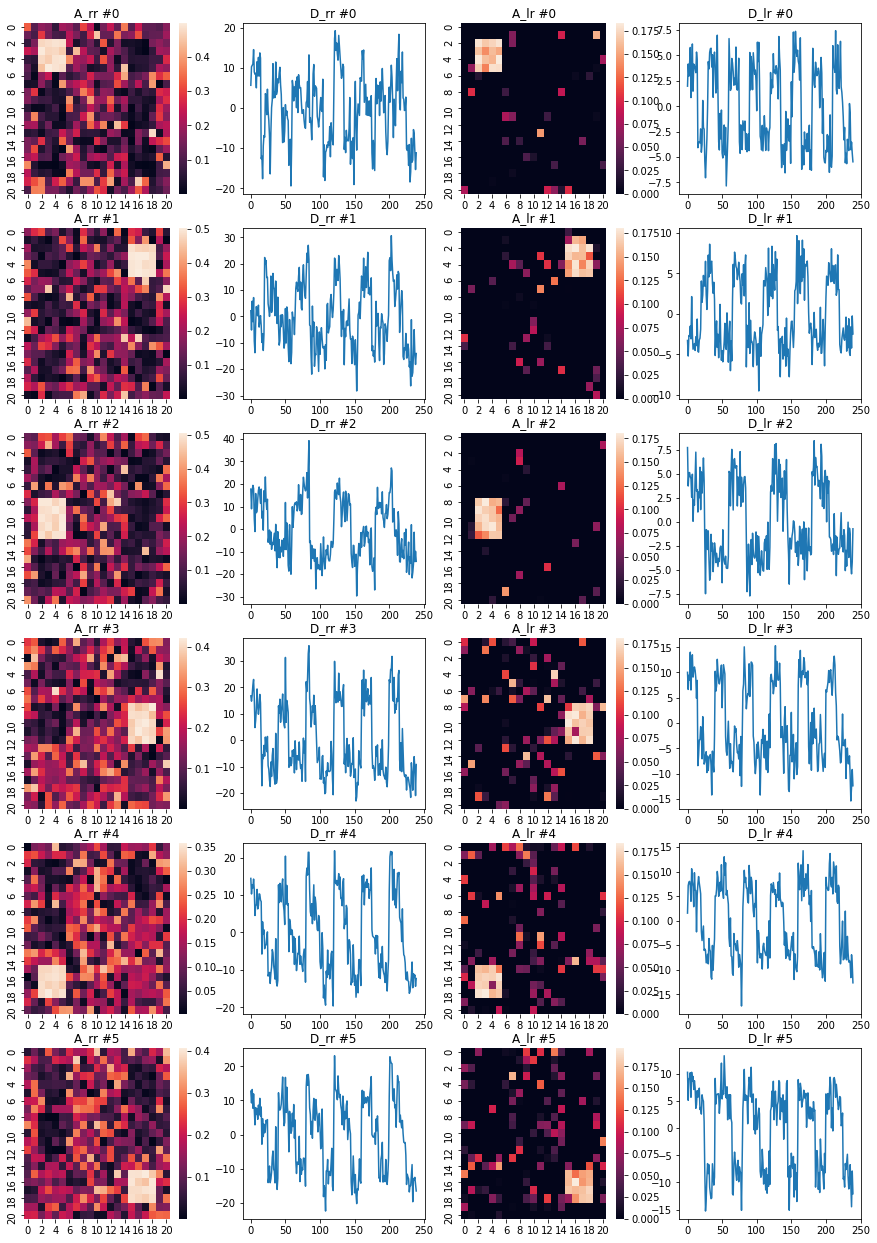

In [21]:
# 2.4ii

# making A_rr and A_lr
A_rr_reshaped = np.absolute(A_rr.reshape(6,21,21))
A_lr_reshaped = np.absolute(A_lr.reshape(6,21,21))

# plotting the sources side by side
fig, axs = plt.subplots(6, 4, figsize = (15,22))

# plot the sources side by side
for row in range(0,6):
    sn.heatmap(A_rr_reshaped[row,:], ax = axs[row][0])
    axs[row][0].set(title="A_rr #"+str(row))
    axs[row][1].plot(D_rr[:,row])
    axs[row][1].set(title="D_rr #"+str(row))
    sn.heatmap(A_lr_reshaped[row,:], ax = axs[row][2])
    axs[row][2].set(title="A_lr #"+str(row))
    axs[row][3].plot(D_lr[:,row])
    axs[row][3].set(title="D_lr #"+str(row))

plt.savefig("q2.4 - column estimates of D and A.png")

We can clearly see that there is significantly more false positives in A_rr in comparison to A_lr. Other than the inability of LSR to handle MC, the main reason behind the bad performance of LSR and RR (both of them producing many false positives while recovering coefficients) is that they incorporate the undesired (noise carrying) pixels into the estimate of A and this also effects the estimate of D in terms of overfitting.

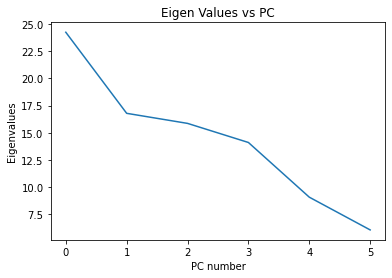

In [22]:
# q2.5

pc_matrix = np.linalg.svd(tc_matrix, full_matrices=False)
pc_U, pc_V, pc_W = pc_matrix
plt.plot(pc_V)
plt.xlabel("PC number")
plt.ylabel("Eigenvalues")
plt.title("Eigen Values vs PC")
plt.savefig("q2.5 - Smallest eigenvalue.png")

Eigenvalue is least for the 6th PC

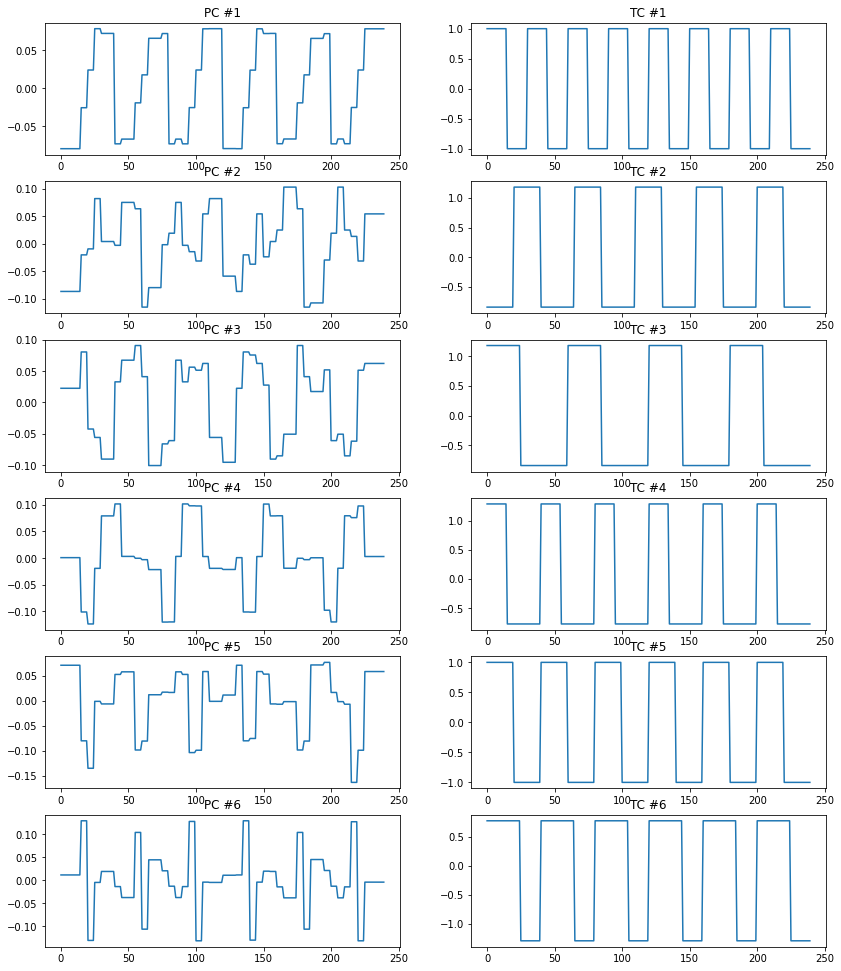

In [39]:
# q2.5 continued

# plotting the regressor with TCs
fig, axs = plt.subplots(6, 2, figsize = (14, 17))

for row in range(0,6):
    axs[row][0].plot(pc_U[:,row])
    axs[row][0].set(title = 'PC #'+str(row+1))
    axs[row][1].plot(range(0,240),tc_matrix[:,row])
    axs[row][1].set(title = 'TC #'+str(row+1))
    
plt.savefig("q2.5 - Regressor and TC.png")

Yes, the PCs are deteriorated. The shape of TC has been lost because the PCs are actually a linear combination of the TCs. Furthermore the shapes of the TCs are lost as it has been projected to the direction of the loading vectors. Thus, not all variances of the ground truth are kept in the PC features.

In [25]:
# q2.5 continued

# estimate LR params with rho = 0.001
step = 1 / np.linalg.norm(np.matmul(pc_U, pc_U.T) * 1.1)
thr = 0.001 * N * step
pc_U_t = pc_U.transpose()
Ao = np.zeros(shape=(nsrcs, 1))
A = np.zeros(shape=(nsrcs, 1))
A_pcr = np.zeros(shape=(nsrcs, x1*x2))
for k in range(0,x1*x2):
    val1 = (X_new[:,k].reshape(X_new.shape[0],) - np.matmul(pc_U, Ao).reshape(X_new.shape[0],))
    A = Ao.reshape(Ao.shape[0],) + step*(np.matmul(pc_U.T, val1)).reshape(Ao.shape[0])
    A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr)
    for i in range(0,10):
        Ao = A
        A = Ao + step*(np.matmul(pc_U.T, X_new[:,k] - np.matmul(pc_U, Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.repeat(0, nsrcs), abs(A) - thr))
    A_pcr[:,k] = A
A_pcr_abs = abs(A_pcr)
D_pcr = np.matmul(X_new, A_pcr_abs.transpose())

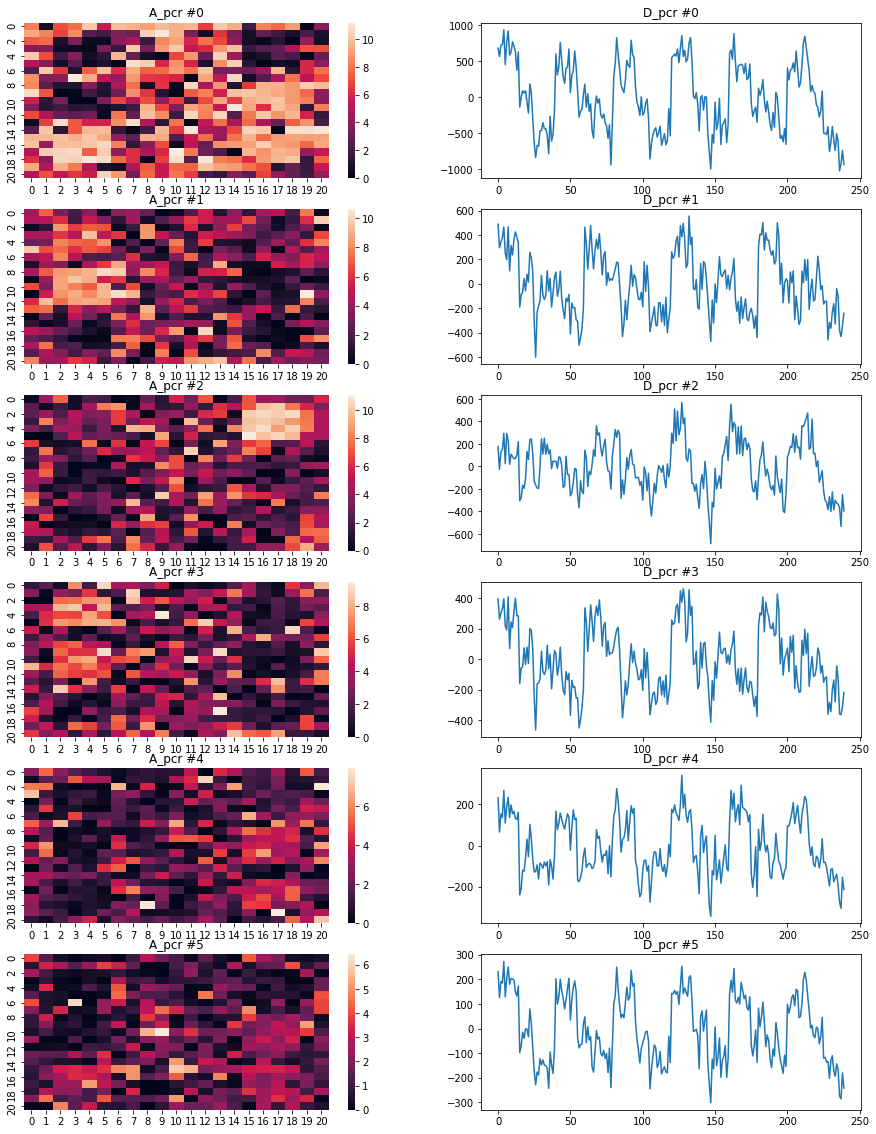

In [27]:
# q2.5 continued

A_pcr_reshaped = (A_pcr_abs.reshape(6,21,21))
# plotting A_pcr and D_pcr side by side
fig, axs = plt.subplots(6, 2, figsize = (15,20))
for row in range(0,6):
    sn.heatmap(A_pcr_reshaped[row,:], ax = axs[row][0])
    axs[row][0].set(title="A_pcr #"+str(row))
    axs[row][1].plot(D_pcr[:,row])
    axs[row][1].set(title="D_pcr #"+str(row))

plt.savefig("q2.5 - D and A.png")

In [33]:
w_df = pd.DataFrame()
w_df['PC 1'] = pc_W[0,:]
w_df['PC 2'] = pc_W[1,:]
w_df['PC 3'] = pc_W[2,:]
w_df['PC 4'] = pc_W[3,:]
w_df['PC 5'] = pc_W[4,:]
w_df['PC 6'] = pc_W[5,:]

w_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,-0.075477,-0.656230,-0.273831,0.694910,-0.023526,0.072310
1,0.001820,0.230610,-0.922861,-0.154525,-0.266949,-0.001894
2,-0.076449,-0.695108,-0.080332,-0.701461,0.082216,0.075630
3,-0.559282,0.094194,-0.179611,0.023956,0.687565,-0.415635
4,-0.599125,0.142422,0.038612,0.002059,-0.021309,0.786648
5,-0.562768,-0.062049,0.182044,-0.024410,-0.669497,-0.444387
